In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [29]:
def calcPartition(ha,hb,hc,Jab,Jbc):
    Z = 0
    for sa in [-1,1]:
        for sb in [-1,1]:
            for sc in [-1,1]:
                Z = Z + np.exp(-(ha*sa+hb*sb+hc*sc-Jab*sa*sb-Jbc*sb*sc))
    return Z


def calcAEntropy(ha,hb,hc,Jab,Jbc):
    Zafm = calcPartition(-ha,hb,hc,Jab,Jbc)
    Zfm = calcPartition(ha,hb,hc,Jab,Jbc)
    Fafm = -np.log(Zafm)
    Ffm = -np.log(Zfm)
    return Fafm - Ffm

def calcACEntropy(ha,hb,hc,Jab,Jbc):
    Zafm = calcPartition(-ha,hb,-hc,Jab,Jbc)
    Zfm = calcPartition(ha,hb,hc,Jab,Jbc)
    Fafm = -np.log(Zafm)
    Ffm = -np.log(Zfm)
    return Fafm - Ffm

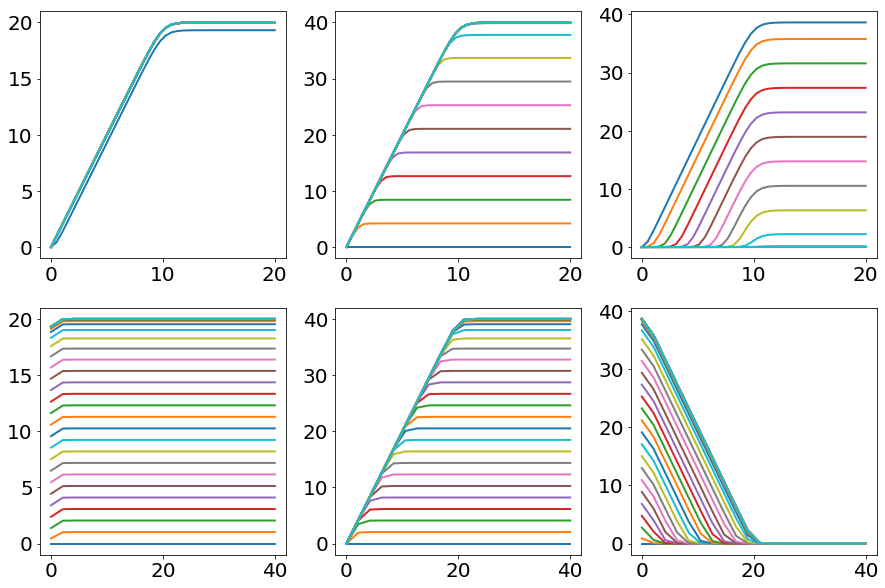

In [54]:
ha = 10
hb_len = 20
hb_max = 40
hb_l = np.linspace(0,hb_max,hb_len)
hc = 10

J_len = 40
J_max = 20
J_l = np.linspace(0,J_max,J_len)
SA_arr = np.zeros((J_len,hb_len))
SAC_arr = np.zeros((J_len,hb_len))

for (idx_J,J) in enumerate(J_l):
    for (idx_hb,hb) in enumerate(hb_l):
        SA_arr[idx_J,idx_hb] = calcAEntropy(ha,hb,hc,J,J)
        SAC_arr[idx_J,idx_hb] = calcACEntropy(ha,hb,hc,J,J)

cmi_arr = 2*SA_arr-SAC_arr

plt.rcParams["figure.figsize"] = (15,10)
plt.subplot(2,3,1)
for (idx_hb,hb) in enumerate(hb_l): 
    plt.plot(J_l,SA_arr[:,idx_hb])
plt.subplot(2,3,2)
for (idx_hb,hb) in enumerate(hb_l): 
    plt.plot(J_l,SAC_arr[:,idx_hb])
plt.subplot(2,3,3)
for (idx_hb,hb) in enumerate(hb_l): 
    plt.plot(J_l,cmi_arr[:,idx_hb])
plt.subplot(2,3,4)
for (idx_J,J) in enumerate(J_l): 
    plt.plot(hb_l,SA_arr[idx_J,:])
plt.subplot(2,3,5)
for (idx_J,J) in enumerate(J_l): 
    plt.plot(hb_l,SAC_arr[idx_J,:])
plt.subplot(2,3,6)
for (idx_J,J) in enumerate(J_l): 
    plt.plot(hb_l,cmi_arr[idx_J,:])

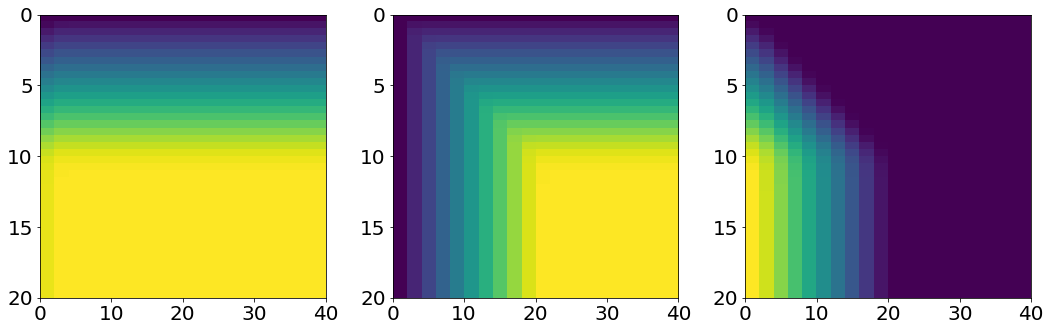

In [61]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,3,1)
plt.imshow(SA_arr,extent=[hb_l[0],hb_l[-1],J_l[-1],J_l[0]], aspect='auto')
# plt.xlabel("# measurements")
# plt.ylabel("circuit depth")
plt.subplot(1,3,2)
plt.imshow(SAC_arr,extent=[hb_l[0],hb_l[-1],J_l[-1],J_l[0]], aspect='auto')
plt.subplot(1,3,3)
plt.imshow(cmi_arr,extent=[hb_l[0],hb_l[-1],J_l[-1],J_l[0]], aspect='auto')
# plt.xlabel("# measurements")
# plt.ylabel("circuit depth")
plt.tight_layout()